In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_avaliacoes = pd.read_csv ('avaliacoes_final.csv', sep = ',', encoding = 'latin1')
df_clinicas = pd.read_csv ('clinicas_final.csv', sep = ',', encoding = 'latin1')
df_consultas = pd.read_csv ('consultas_final.csv', sep = ',', encoding = 'latin1')
df_medicos = pd.read_csv ('medicos_final.csv', sep = ',', encoding = 'latin1')
df_pacientes = pd.read_csv ('pacientes_final.csv', sep = ',', encoding = 'latin1')

In [6]:
#transformar colunas object em datetime

df_consultas['data_hora_agendada'] = pd.to_datetime(df_consultas['data_hora_agendada'])
df_consultas['data_hora_inicio'] = pd.to_datetime(df_consultas['data_hora_inicio'])

In [7]:
#criar coluna para tempo de espera

df_consultas.loc[df_consultas['status'] == 'Realizada', 'tempo_espera'] = df_consultas['data_hora_inicio'] - df_consultas['data_hora_agendada']
df_consultas

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,0 days 00:30:00
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,0 days 04:00:00
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,0 days 00:15:00
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,0 days 04:00:00
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,NaT
...,...,...,...,...,...,...,...,...,...
4995,4996,27,27,93,Pediatria,2023-03-28 04:34:00,2023-03-28 05:34:00,Cancelada,NaT
4996,4997,17,26,8,Cardiologia,2023-12-06 12:39:00,2023-12-06 12:54:00,Realizada,0 days 00:15:00
4997,4998,60,39,34,Ortopedia,2023-11-06 11:27:00,2023-11-06 11:27:00,Realizada,0 days 00:00:00
4998,4999,65,7,98,Dermatologia,2023-10-07 20:19:00,2023-10-07 22:19:00,Realizada,0 days 02:00:00


In [ ]:
#relacionar tabela consulta com medicos para saber qual id é de qual médico, não funciona não sei porque
#relacionar tabela consultas com avaliacoes id da consulta em consultas com id consulta em avaliacoes e correlacionar nota de satisfacao e tempo_espera

#df_consulta_medicos = pd.merge(df_consultas, df_medicos, on='id_medico', how='inner')
#df_consulta_medicos

df_consulta_avaliacoes = pd.merge(df_consultas, df_avaliacoes, on='id_consulta', how='inner')
df_consulta_avaliacoes

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera,nota_satisfacao,comentario
0,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,0 days 04:00:00,4,ComentÃ¡rio 3
1,16,82,89,72,Ortopedia,2023-03-21 23:01:00,2023-03-22 00:01:00,Cancelada,NaT,1,ComentÃ¡rio 83
2,34,11,94,63,Pediatria,2023-10-25 02:31:00,2023-10-25 02:36:00,Remarcada,NaT,1,ComentÃ¡rio 2
3,80,90,14,49,Dermatologia,2023-11-14 13:06:00,2023-11-14 13:06:00,Cancelada,NaT,1,ComentÃ¡rio 51
4,85,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0 days 00:00:00,1,ComentÃ¡rio 97
...,...,...,...,...,...,...,...,...,...,...,...
95,4743,79,71,42,Neurologia,2023-02-09 14:03:00,2023-02-09 19:03:00,Realizada,0 days 05:00:00,5,ComentÃ¡rio 14
96,4874,52,88,93,Ortopedia,2023-06-11 05:05:00,2023-06-11 05:05:00,Realizada,0 days 00:00:00,5,ComentÃ¡rio 29
97,4880,99,27,99,Pediatria,2023-10-20 19:55:00,2023-10-20 20:10:00,Realizada,0 days 00:15:00,2,ComentÃ¡rio 96
98,4916,85,19,39,Cardiologia,2023-03-01 02:15:00,2023-03-01 03:15:00,Realizada,0 days 01:00:00,2,ComentÃ¡rio 44


In [ ]:
#relacionar tabela consulta com clnicas para saber qual id é de qual clinica e acrescentar a coluna com o nome

df_consulta_clinicas = pd.merge(df_consultas, df_clinicas[['id_clinica', 'nome']], on='id_clinica', how='inner')
df_consulta_clinicas


,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera,nome
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,0 days 00:30:00,Bem Viver
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,0 days 04:00:00,ClÃ­nica EsperanÃ§a
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,0 days 00:15:00,Bem Viver
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,0 days 04:00:00,Bem Viver
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,NaT,Bem Viver
...,...,...,...,...,...,...,...,...,...,...
4995,4996,27,27,93,Pediatria,2023-03-28 04:34:00,2023-03-28 05:34:00,Cancelada,NaT,ClÃ­nica Horizonte
4996,4997,17,26,8,Cardiologia,2023-12-06 12:39:00,2023-12-06 12:54:00,Realizada,0 days 00:15:00,Vida Plena
4997,4998,60,39,34,Ortopedia,2023-11-06 11:27:00,2023-11-06 11:27:00,Realizada,0 days 00:00:00,ClÃ­nica Vital
4998,4999,65,7,98,Dermatologia,2023-10-07 20:19:00,2023-10-07 22:19:00,Realizada,0 days 02:00:00,ClÃ­nica Horizonte


In [22]:
#criar funções para calcular quartis, verificar outliers e calcular media, mediana e distancia

def calcular_quartis (a):
    q1 = np.percentile (a, 25)
    q2 = np.percentile (a, 50)
    q3 = np.percentile (a, 75)
    return q1, q2, q3

def analise_outliers(a):
    q1, q2, q3 = calcular_quartis(a) 
    iqr = q3 - q1
    limite_superior = q1 + (1.5 * iqr)
    limite_inferior = q3 - (1.5 * iqr)
    return print (f'''O primeiro quartil é até {q1}, o segundo até {q2} e o terceiro até {q3}. 
                  O IQR é {iqr}, limite inferior é {limite_inferior} e limite superior é {limite_superior}''')

def media(g):
    media = np.mean(g)
    return media

def mediana(h):
    mediana = np.median(h)
    return mediana

def distancia_media_mediana(i,j):
    distancia = (i - j) / j
    distancia_percentual = f'{(distancia * 100):.2f}%'
    return distancia_percentual

In [9]:
#convertendo o tempo de timedelta para numero

df_consulta_avaliacoes['espera_min'] = df_consulta_avaliacoes['tempo_espera'].dt.total_seconds() / 60
df_consulta_avaliacoes

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera,nota_satisfacao,comentario,espera_min
0,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,0 days 04:00:00,4,ComentÃ¡rio 3,240.0
1,16,82,89,72,Ortopedia,2023-03-21 23:01:00,2023-03-22 00:01:00,Cancelada,NaT,1,ComentÃ¡rio 83,NaN
2,34,11,94,63,Pediatria,2023-10-25 02:31:00,2023-10-25 02:36:00,Remarcada,NaT,1,ComentÃ¡rio 2,NaN
3,80,90,14,49,Dermatologia,2023-11-14 13:06:00,2023-11-14 13:06:00,Cancelada,NaT,1,ComentÃ¡rio 51,NaN
4,85,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0 days 00:00:00,1,ComentÃ¡rio 97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4743,79,71,42,Neurologia,2023-02-09 14:03:00,2023-02-09 19:03:00,Realizada,0 days 05:00:00,5,ComentÃ¡rio 14,300.0
96,4874,52,88,93,Ortopedia,2023-06-11 05:05:00,2023-06-11 05:05:00,Realizada,0 days 00:00:00,5,ComentÃ¡rio 29,0.0
97,4880,99,27,99,Pediatria,2023-10-20 19:55:00,2023-10-20 20:10:00,Realizada,0 days 00:15:00,2,ComentÃ¡rio 96,15.0
98,4916,85,19,39,Cardiologia,2023-03-01 02:15:00,2023-03-01 03:15:00,Realizada,0 days 01:00:00,2,ComentÃ¡rio 44,60.0


In [11]:
#retirando tudo que não é número, como NaN e vazios, por exemplo

df_consulta_avaliacoes_plot = df_consulta_avaliacoes.dropna(subset=['tempo_espera', 'nota_satisfacao'])
df_consulta_avaliacoes_plot

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera,nota_satisfacao,comentario,espera_min
0,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,0 days 04:00:00,4,ComentÃ¡rio 3,240.0
4,85,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0 days 00:00:00,1,ComentÃ¡rio 97,0.0
5,231,80,72,42,Pediatria,2023-11-30 05:37:00,2023-11-30 10:37:00,Realizada,0 days 05:00:00,2,ComentÃ¡rio 60,300.0
8,372,51,92,93,Ginecologia,2023-06-24 06:38:00,2023-06-24 10:38:00,Realizada,0 days 04:00:00,4,ComentÃ¡rio 50,240.0
10,411,34,84,100,Ginecologia,2023-07-30 14:47:00,2023-07-30 19:47:00,Realizada,0 days 05:00:00,2,ComentÃ¡rio 35,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4743,79,71,42,Neurologia,2023-02-09 14:03:00,2023-02-09 19:03:00,Realizada,0 days 05:00:00,5,ComentÃ¡rio 14,300.0
96,4874,52,88,93,Ortopedia,2023-06-11 05:05:00,2023-06-11 05:05:00,Realizada,0 days 00:00:00,5,ComentÃ¡rio 29,0.0
97,4880,99,27,99,Pediatria,2023-10-20 19:55:00,2023-10-20 20:10:00,Realizada,0 days 00:15:00,2,ComentÃ¡rio 96,15.0
98,4916,85,19,39,Cardiologia,2023-03-01 02:15:00,2023-03-01 03:15:00,Realizada,0 days 01:00:00,2,ComentÃ¡rio 44,60.0


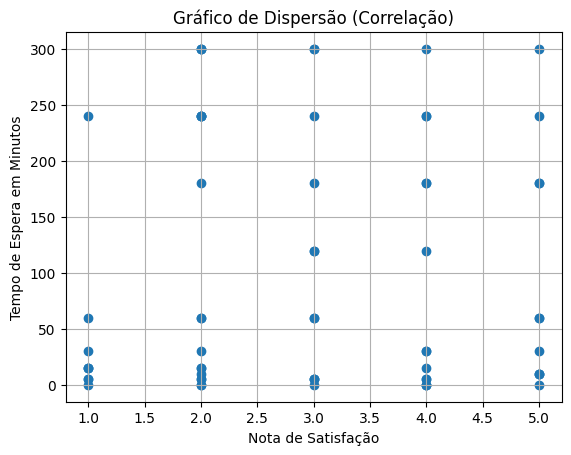

In [12]:
#correlacionar tempo de espera em minutos com nota de satisfacao, gráfico de dispersão
#df_consulta_avaliacoes

plt.scatter(df_consulta_avaliacoes_plot['nota_satisfacao'], df_consulta_avaliacoes_plot['espera_min'])
plt.title('Gráfico de Dispersão (Correlação)')
plt.xlabel('Nota de Satisfação')
plt.ylabel('Tempo de Espera em Minutos')
plt.grid(True)
plt.show()

In [ ]:
#especialidade
#especialidades menos e mais bem avaliadas na nota de satisfacao, quartis e outliers
#df_consulta_avaliacoes_plot

df_especialidade_media_espera = df_consulta_avaliacoes_plot.groupby(['especialidade']) ['espera_min'].mean().reset_index()
df_especialidade_media_espera.sort_values(by='espera_min')


,especialidade,espera_min
1,Dermatologia,64.166667
4,Ortopedia,72.142857
3,Neurologia,77.857143
0,Cardiologia,98.333333
5,Pediatria,106.764706
2,Ginecologia,164.090909


In [14]:
#criando array para guardar os valores de espera_min e criar os quartis

array_espera_min = np.array(df_especialidade_media_espera['espera_min'])
array_espera_min

array([ 98.33333333,  64.16666667, 164.09090909,  77.85714286,
        72.14285714, 106.76470588])

In [20]:
#chamar a funcao para calcular os quartis

calcular_quartis (array_espera_min)

(np.float64(73.57142857142857),
 np.float64(88.0952380952381),
 np.float64(104.65686274509804))

In [23]:
#chamar a funcao para calcular os outliers, uma funcao dentro da outra

analise_outliers(array_espera_min)

O primeiro quartil é até 73.57142857142857, o segundo até 88.0952380952381 e o terceiro até 104.65686274509804. 
                  O IQR é 31.08543417366947, limite inferior é 58.028711484593835 e limite superior é 120.19957983193277


In [ ]:
#valores abaixo do limite inferior
#não há outliers inferiores

df_outlier_inferior = df_especialidade_media_espera.loc[df_especialidade_media_espera['espera_min'] < 58.028711484593835] 
#não consigo trazer a variavel por ser uma variavel local dentro da funcao que calcula os outliers
df_outlier_inferior

,especialidade,espera_min


In [ ]:
#valores abaixo do limite superior
#a especialidade Ginecologia é um outlier 

df_outlier_superior = df_especialidade_media_espera.loc[df_especialidade_media_espera['espera_min'] > 120.19957983193277] 
df_outlier_superior

,especialidade,espera_min
2,Ginecologia,164.090909


In [ ]:
#calcular a media e mediana de espera das clinicas nara - geral - e distancia entre elas
#pode-se usar qualquer um das duas métricas para dizer qual é a media de espera para consulta nas clinicas nara

media_valor = media(array_espera_min)
mediana_valor = mediana (array_espera_min)

print(media_valor)
print(mediana_valor)

distancia_media_mediana(media_valor,mediana_valor)

97.22593582887701
88.0952380952381


'10.36%'